# Triple Exponential Model

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
data = pd.read_csv(r"C:\Users\komal\Downloads\AirPassenger.csv")
data.head(5)

,Date,Passenger
0,01-01-1949,112
1,01-02-1949,118
2,01-03-1949,132
3,01-04-1949,129
4,01-05-1949,121


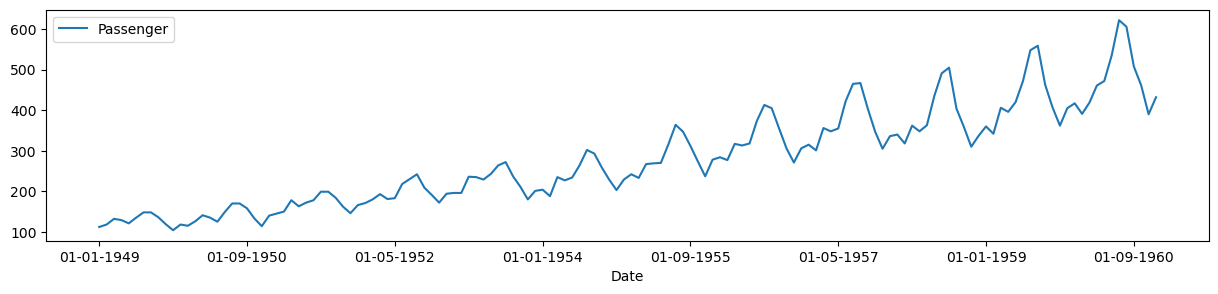

In [4]:
data.plot.line(x = 'Date',y = 'Passenger',figsize=(15,3))
plt.show()  # Trend , Seasonal

In [5]:
data2 = data.set_index("Date")
data2.head()

,Passenger
Date,
01-01-1949,112
01-02-1949,118
01-03-1949,132
01-04-1949,129
01-05-1949,121


abc=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93])

#### Auto Model

In [8]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params
          # initial_seasons=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93]))

C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.318576371803696,
 'smoothing_trend': 5.380954242859452e-08,
 'smoothing_seasonal': 0.6013457302289144,
 'damping_trend': nan,
 'initial_level': 102.54484051507897,
 'initial_trend': 2.4111368439877503,
 'initial_seasons': array([1.06149954, 1.11635748, 1.23277036, 1.17598123, 1.09782071,
        1.1988954 , 1.30367509, 1.28767073, 1.17398358, 1.02414035,
        0.90691178, 1.03870969]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [9]:
data2["Level"] = round(model2.level)
data2["Trend"] = round(model2.trend)
data2["Seasonal"] = round(model2.season)
data2["Forecast"] = round(model2.fittedvalues)
data2.head()

,Passenger,Level,Trend,Seasonal,Forecast
Date,,,,,
01-01-1949,112,105.0,2.0,1.0,111.0
01-02-1949,118,107.0,2.0,1.0,120.0
01-03-1949,132,109.0,2.0,1.0,135.0
01-04-1949,129,111.0,2.0,1.0,131.0
01-05-1949,121,112.0,2.0,1.0,124.0


df = pd.DataFrame(
    np.c_[data.Passenger, model2.level, model2.trend, model2.season,model2.fittedvalues],
    columns=["Actual","Level","Trend","Seasonal","Forecast"])
df

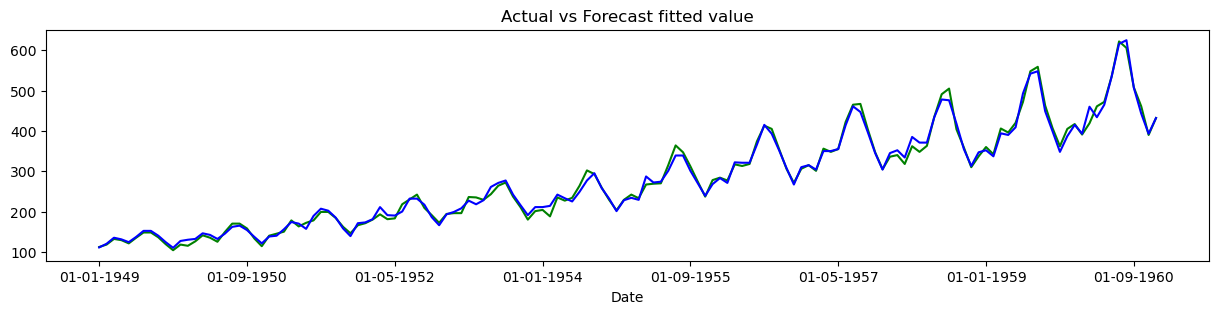

In [11]:
plt.title("Actual vs Forecast fitted value")
data2.Passenger.plot(color='green')
data2.Forecast.plot( color='blue',figsize=(15,3))
plt.show()

### Future Forecast 

In [13]:
Forecast2 = np.round(model2.forecast(36),2)
Forecast2

C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\komal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


144    445.24
145    418.23
146    465.31
147    494.95
148    505.48
149    573.31
150    663.60
151    654.90
152    546.76
153    488.45
154    415.72
155    460.38
156    474.07
157    445.16
158    495.12
159    526.49
160    537.51
161    609.46
162    705.21
163    695.76
164    580.70
165    518.61
166    441.26
167    488.52
168    502.90
169    472.09
170    524.92
171    558.02
172    569.55
173    645.60
174    746.83
175    736.62
176    614.63
177    548.77
178    466.80
179    516.65
dtype: float64

#### Forecast Plot

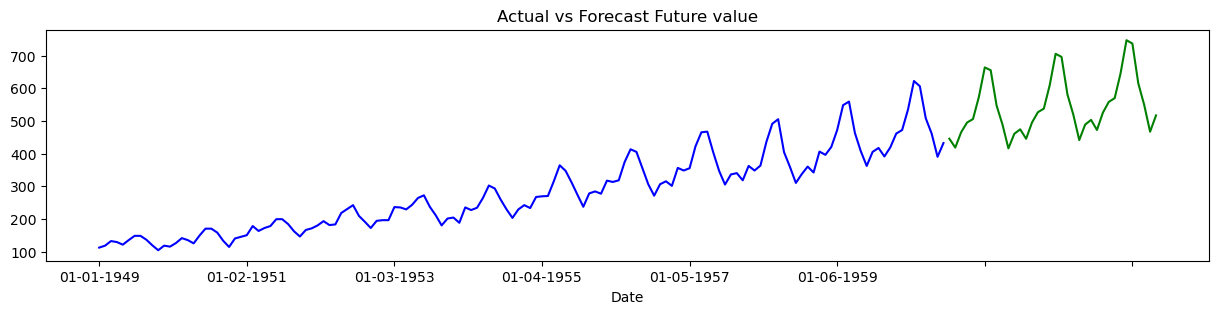

In [15]:
plt.title("Actual vs Forecast Future value")
Forecast2.plot(color='green')
data2.Passenger.plot(color='blue',figsize=(15,3))
plt.show()

#### Accuracy of Model

In [17]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Passenger - data2.Forecast)/np.abs(data2.Passenger))*100
mean_absolute_percentage_error

3.077042536639639

# Finished 